# Functions optimalization and visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
def Fcelu(x):
    x1, x2 = x
    return (4*np.sin(np.pi*x1) + 6*np.sin(np.pi*x2)) + (x1 - 1)**2 + (x2 - 1)**2

### modified 3D plot with enabled (x1,x2) rotation

In [4]:
#modified 3d (now supports axes rotation by multiplicity of 90deg)
def pokaz_3D(Fcelu, zakres, rotation:int|bool=0):
  os_x1 = np.linspace(zakres[0], zakres[1], 50)
  os_x2 = np.linspace(zakres[2], zakres[3], 50)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)

  fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection':'3d'})
  if rotation==270:
    ax.plot_surface(-siatka_X2, siatka_X1, Fcelu([siatka_X1, siatka_X2]), cmap='Spectral_r')
    ax.set_xlabel('x2', fontsize=14)
    ax.set_ylabel('x1', fontsize=14)
  elif rotation==180:
    ax.plot_surface(-siatka_X1, -siatka_X2, Fcelu([siatka_X1, siatka_X2]), cmap='Spectral_r')
    ax.set_xlabel('x2', fontsize=14)
    ax.set_ylabel('x1', fontsize=14)
  elif rotation==90:
    ax.plot_surface(siatka_X2, -siatka_X1, Fcelu([siatka_X1, siatka_X2]), cmap='Spectral_r')
    ax.set_xlabel('x2', fontsize=14)
    ax.set_ylabel('x1', fontsize=14)
  else:
    ax.plot_surface(siatka_X1, siatka_X2, Fcelu([siatka_X1, siatka_X2]), cmap='Spectral_r')
    ax.set_xlabel('x1', fontsize=14)
    ax.set_ylabel('x2', fontsize=14)
  ax.set_zlabel('F', fontsize=14)
  plt.show()

In [5]:
def pokaz_2D(Fcelu, x_historia, zakres):
  x_pocz, x_opt = x_historia[0], x_historia[-1]
  os_x1 = np.linspace(zakres[0], zakres[1], num=100)
  os_x2 = np.linspace(zakres[2], zakres[3], num=100)
  siatka_X1, siatka_X2 = np.meshgrid(os_x1, os_x2)
  macierz_Z = Fcelu([siatka_X1, siatka_X2])

  fig, ax = plt.subplots(figsize=(8,8))
  cplot = ax.contourf(siatka_X1, siatka_X2, macierz_Z, 10, cmap='Spectral_r', alpha=1)
  clines = ax.contour(siatka_X1, siatka_X2, macierz_Z, 10, colors='black')
  for punkt in x_historia:
      ax.plot(punkt[0], punkt[1], 'o', 
              color='white', markeredgecolor='black', markersize=5, alpha=0.7)
  ax.plot(x_pocz[0], x_pocz[1], 'd', 
          color='gray', markeredgecolor='black', markersize=10, alpha=0.7)    
  ax.plot(x_opt[0], x_opt[1], 'h', 
          color='white', markeredgecolor='black', markersize=15)
  ax.set_aspect('equal')
  ax.set_xlabel(r'x1', fontsize=16)
  ax.set_ylabel(r'x2', fontsize=16)
  ax.clabel(clines)
  fig.colorbar(cplot)
  return fig, ax

## Basic optimization (Nelder-Mead Simplex algorithm)

Optimization terminated successfully.
         Current function value: 1.886796
         Iterations: 41
         Function evaluations: 79


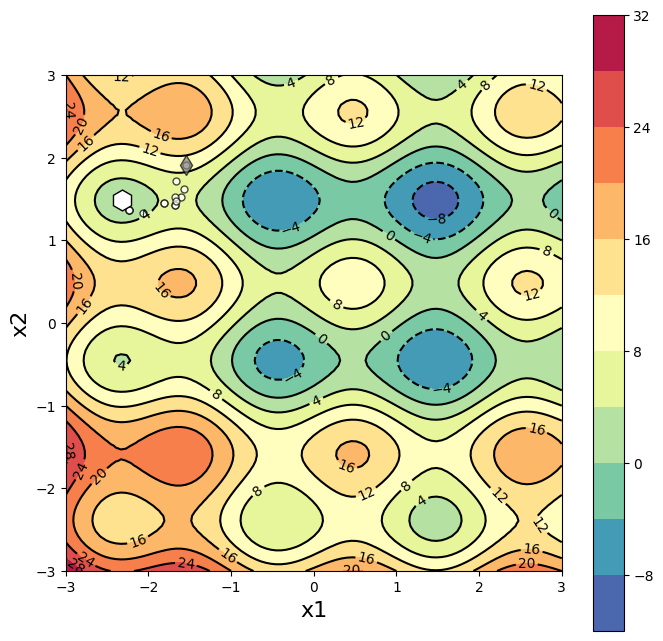

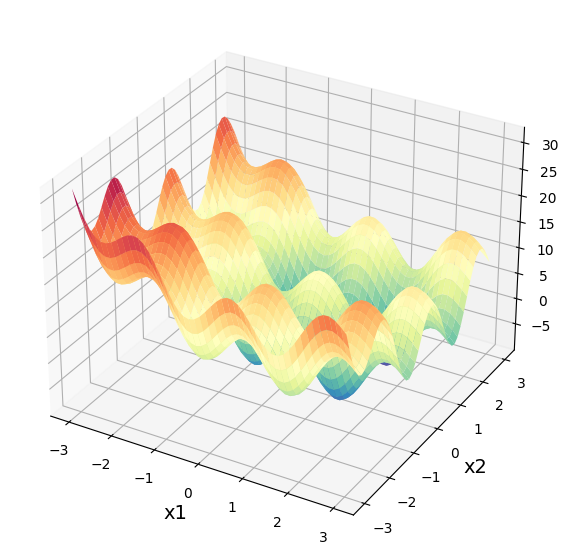

In [6]:
#first optimization:
x_opt, x_historia = optimize.fmin(Fcelu,
                                  np.random.uniform(-2,2, size=2),
                                  retall=True)

zakres=[-3, 3, -3, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)
plt.show()

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 40
         Function evaluations: 73


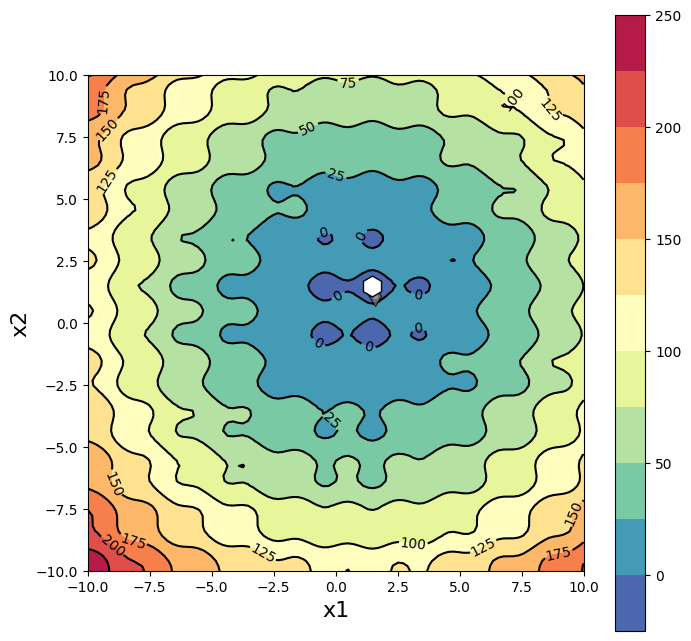

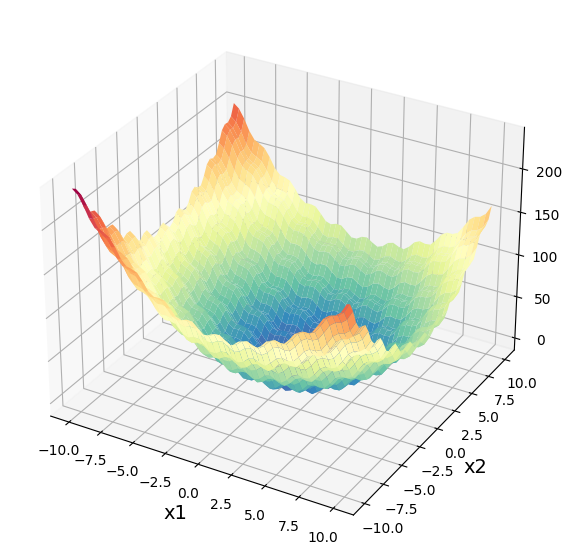

In [7]:
#second optimization:
x_opt, x_historia = optimize.fmin(Fcelu,
                                  np.random.uniform(-2,2, size=2),
                                  retall=True)

zakres=[-10, 10, -10, 10]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)
plt.show()

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 41
         Function evaluations: 77


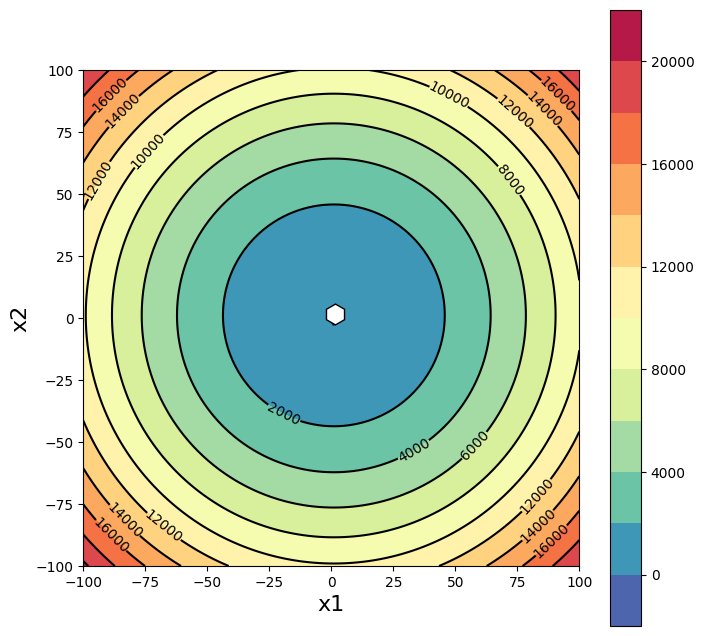

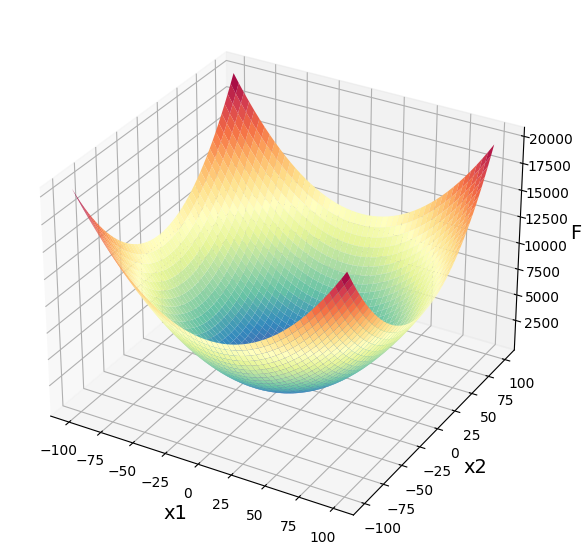

In [8]:
#third optimization (for perspective):
x_opt, x_historia = optimize.fmin(Fcelu,
                                  np.random.uniform(-2,2, size=2),
                                  retall=True)
zakres=[-100, 100, -100, 100]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres)
plt.show()

## Optimization with constraints:

In [9]:
def pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia, gx=None):
  fig, ax = pokaz_2D(Fcelu, x_historia=[x_pocz, x_opt], zakres=zakres)

  if 'fun' in ograniczenia:
    os_x1 = np.linspace(zakres[0], zakres[1], num=100)
    krzywa_g_x1 = gx(os_x1)
    ax.plot(os_x1, krzywa_g_x1, color='black')
    ax.fill_between(os_x1, krzywa_g_x1, color='grey', alpha=0.7)
    ax.set_ylim(*zakres[2:])
  else:
    obszar_dopuszczalny = plt.Rectangle((ograniczenia['x1'][0], ograniczenia['x2'][0]),
                                        ograniczenia['x1'][1]-ograniczenia['x1'][0],
                                        ograniczenia['x2'][1]-ograniczenia['x2'][0],
                                        facecolor='gray', edgecolor='black', alpha=0.7)
    ax.add_patch(obszar_dopuszczalny)
  ax.plot(x_pocz[0], x_pocz[1], 'd', 
          color='gray', markeredgecolor='black', markersize=10, alpha=0.7) 
  return fig, ax

function value: -3.71735445123163


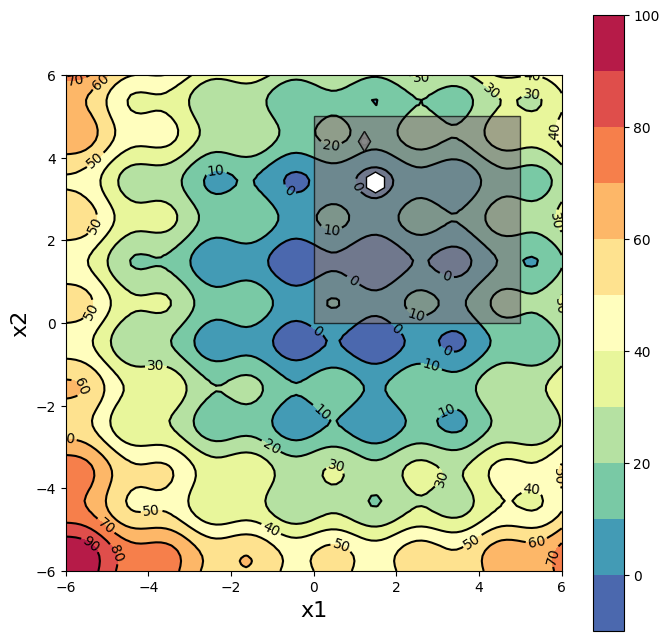

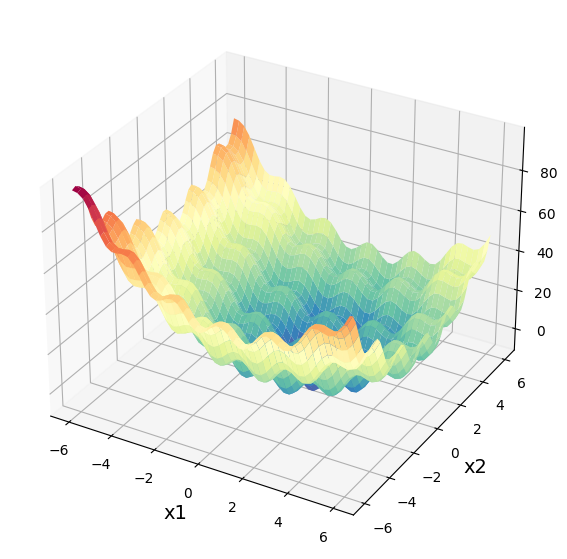

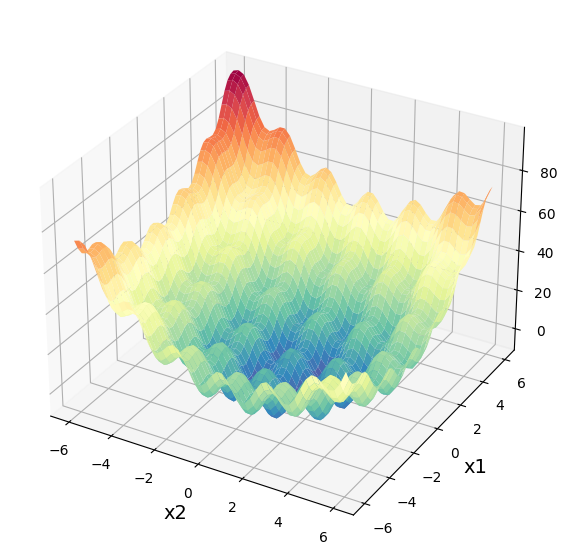

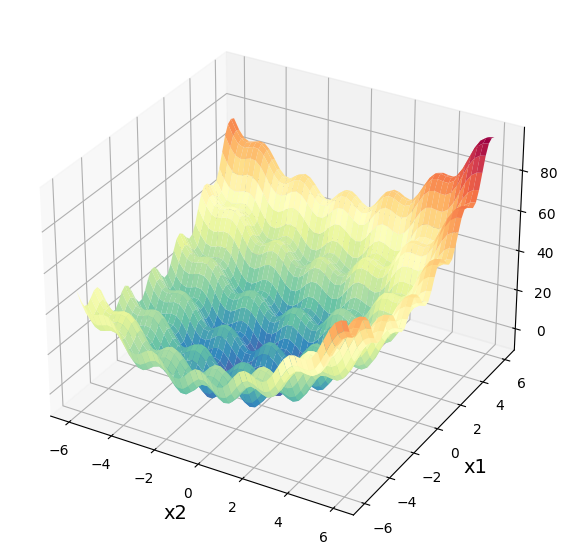

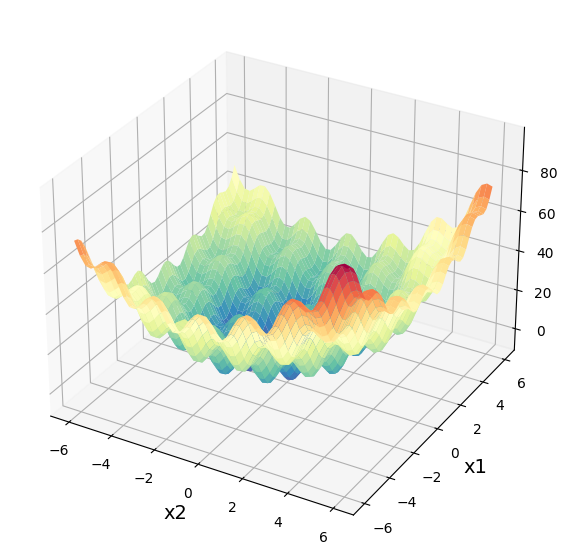

In [10]:
#optimization with constraints:
ograniczenia = {'x1': (0, 5), 
                'x2': (0, 5)}

x_pocz = (np.random.uniform(*ograniczenia['x1']),
          np.random.uniform(*ograniczenia['x2']))
x_opt = optimize.minimize(Fcelu, x_pocz, method='TNC', bounds=list(ograniczenia.values())).x
print(f"function value: {Fcelu(x_opt)}")
zakres = [-6, 6, -6, 6]
pokaz2D_z_ogr(Fcelu, x_pocz, x_opt, zakres, ograniczenia)
plt.show()
zakres_3d = [np.min([zakres[0], ograniczenia['x1'][0]]),
                 np.max([zakres[1], ograniczenia['x1'][1]]),
                 np.min([zakres[2], ograniczenia['x2'][0]]),
                 np.max([zakres[3], ograniczenia['x2'][1]])]
pokaz_3D(Fcelu, zakres_3d, 0)
plt.show()
pokaz_3D(Fcelu, zakres_3d, 90)
plt.show()
pokaz_3D(Fcelu, zakres_3d, 180)
plt.show()
pokaz_3D(Fcelu, zakres_3d, 270)
plt.show()

## Optimization using other functions:

### fmin_powell (modified Powell's method) - nongradient

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 2
         Function evaluations: 39


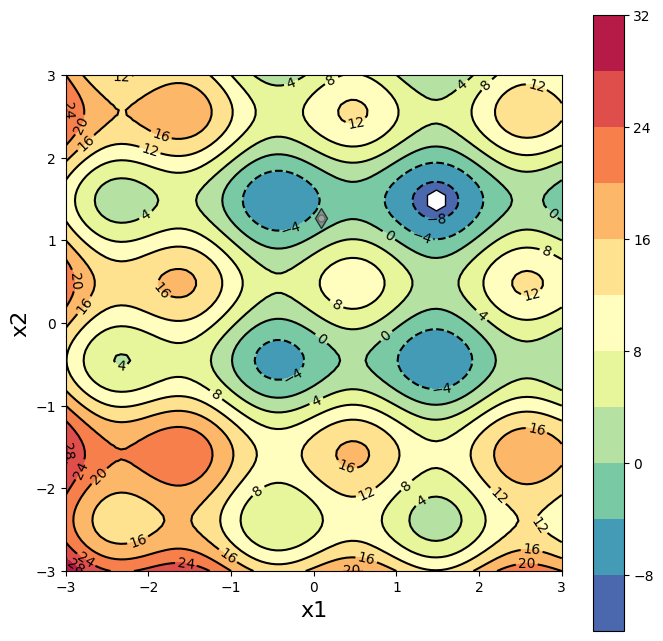

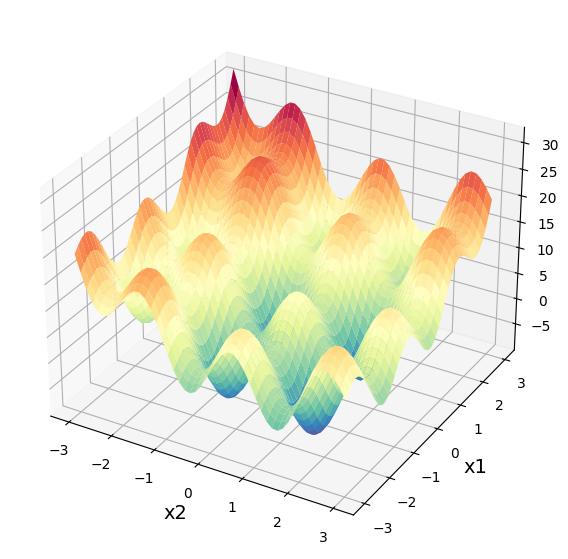

In [11]:
#optimization using other functions:
x_opt, x_historia = optimize.fmin_powell(Fcelu,
                                  np.random.uniform(-2,2, size=2),
                                  retall=True)

zakres=[-3, 3, -3, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres, 90)
plt.show()

### fmin_cg (nonlinear conjugate gradient algorithm)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 7
         Function evaluations: 45
         Gradient evaluations: 15


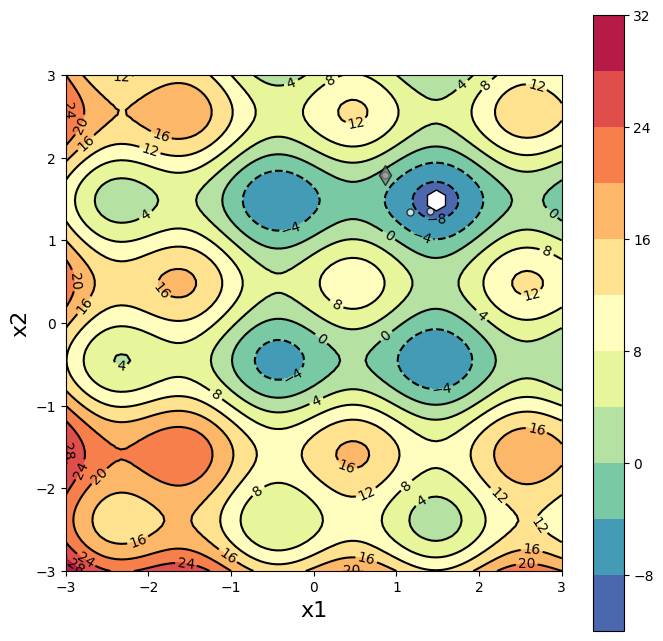

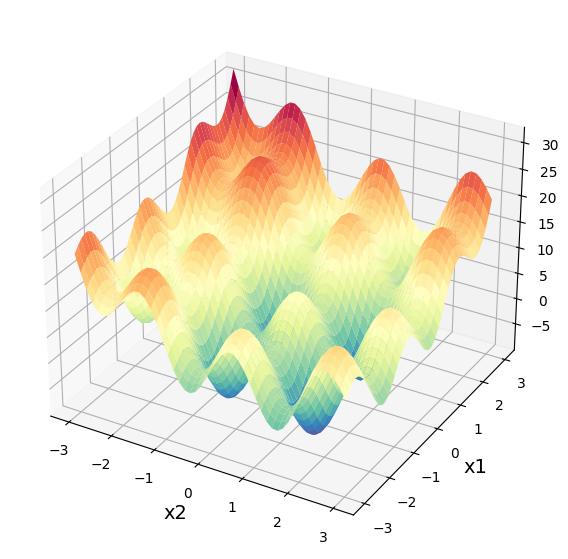

In [12]:
x_opt, x_historia = optimize.fmin_cg(Fcelu,
                                  np.random.uniform(-2,2, size=2),
                                  retall=True)

zakres=[-3, 3, -3, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres, 90)
plt.show()

### fmin_bfgs (Broyden-Fletcher-Goldfarb-Shanno algorithm)

Optimization terminated successfully.
         Current function value: -5.682591
         Iterations: 10
         Function evaluations: 48
         Gradient evaluations: 16


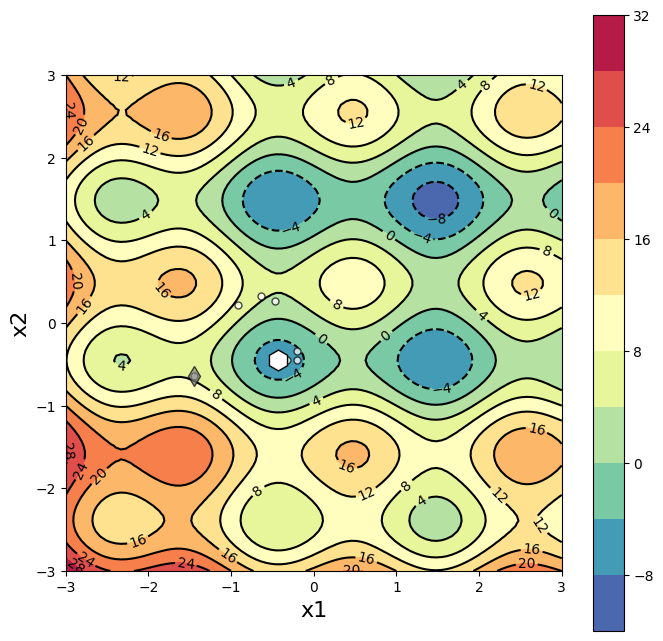

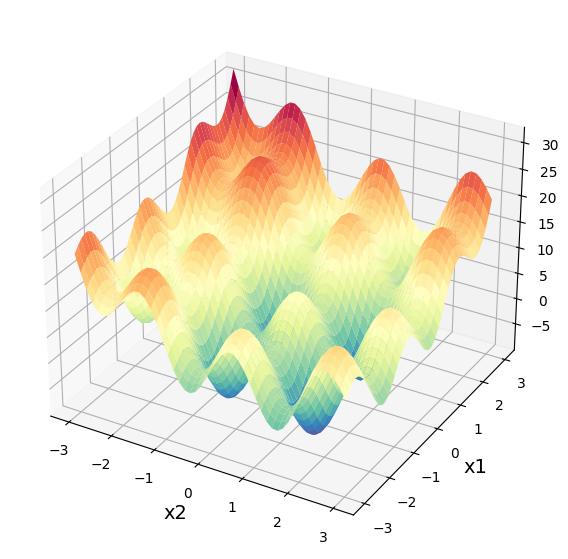

In [13]:
x_opt, x_historia = optimize.fmin_bfgs(Fcelu,
                                  np.random.uniform(-2,2, size=2),
                                  retall=True)

zakres=[-3, 3, -3, 3]
pokaz_2D(Fcelu, x_historia, zakres)
plt.show()
pokaz_3D(Fcelu, zakres, 90)
plt.show()

### fmin_cobyla for constraint optimalization using circle function

In [14]:
def g1(x):
    x1, x2 = x
    return -((x1 -2)**2 + (x2-2)**2 - 4)

x_pocz = np.random.uniform(-2,2, size=2)                   
x_opt = optimize.fmin_cobyla(Fcelu, x_pocz, cons=[g1])

print(f'Minimum: {x_opt}')
print(f'Minimum wartości funkcji: {Fcelu(x_opt)}')

Minimum: [0.05707201 1.52562585]
Minimum wartości funkcji: -4.101819584856728


## Porównanie różnych metod optymalizacji:

fmin:
Optimization terminated successfully.
         Current function value: -7.617110
         Iterations: 36
         Function evaluations: 68
fmin bfgs:
Optimization terminated successfully.
         Current function value: -7.617110
         Iterations: 8
         Function evaluations: 39
         Gradient evaluations: 13
fmin cg:
Optimization terminated successfully.
         Current function value: -7.617110
         Iterations: 5
         Function evaluations: 33
         Gradient evaluations: 11
fmin powell:
Optimization terminated successfully.
         Current function value: -7.617110
         Iterations: 2
         Function evaluations: 41


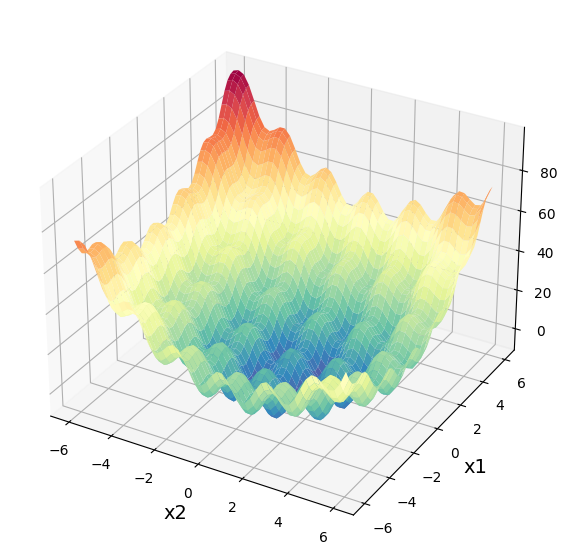

In [17]:
zakres=[-6, 6, -6, 6]
x_pocz = np.random.uniform(-2,2, size=2)
print("fmin:")
x_opt1, x_historia1 = optimize.fmin(Fcelu,
                                  x_pocz,
                                  retall=True)
print("fmin bfgs:")
x_opt2, x_historia2 = optimize.fmin_bfgs(Fcelu,
                                  x_pocz,
                                  retall=True)
print("fmin cg:")
x_opt3, x_historia3 = optimize.fmin_cg(Fcelu,
                                  x_pocz,
                                  retall=True)
print("fmin powell:")
x_opt4, x_historia4 = optimize.fmin_powell(Fcelu,
                                  x_pocz,
                                  retall=True)

pokaz_3D(Fcelu, zakres, 90)
plt.show()